# 12. Convergence Theorems (MCT & DCT)

**Goal:** Show when limits and integrals commute, and counterexamples when they don't.

- **MCT:** If $0 \leq f_1 \leq f_2 \leq \cdots$ and $f_n \to f$ a.e., then $\int f_n \to \int f$.
- **DCT:** If $f_n \to f$ a.e. and $|f_n| \leq g$ with $\int g < \infty$, then $\int f_n \to \int f$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Monotone Convergence Theorem (MCT)

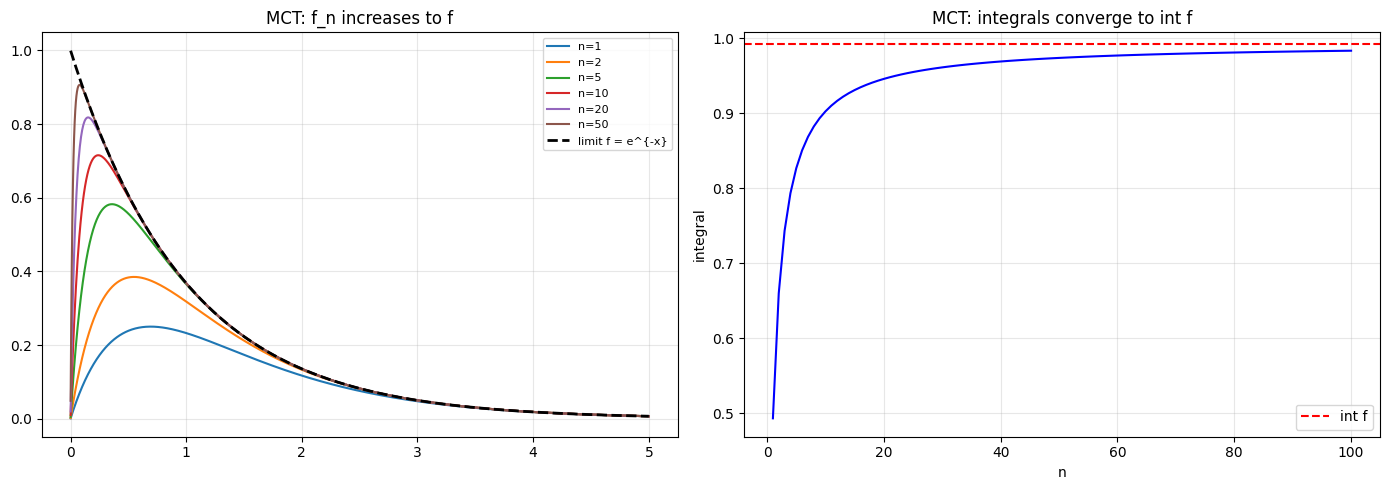

In [2]:
x = np.linspace(0.001, 5, 1000)
f_limit = np.exp(-x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ns = [1, 2, 5, 10, 20, 50]
for n in ns:
    fn = np.minimum(f_limit, n * x * np.exp(-x))
    fn = f_limit * (1 - np.exp(-n*x))  # monotone increasing to e^{-x}
    ax1.plot(x, fn, label=f'n={n}')
ax1.plot(x, f_limit, 'k--', linewidth=2, label='limit f = e^{-x}')
ax1.set_title('MCT: f_n increases to f', fontsize=12)
ax1.legend(fontsize=8); ax1.grid(True, alpha=0.3)

integrals = []
for n in range(1, 101):
    fn = f_limit * (1 - np.exp(-n*x))
    integrals.append(np.trapezoid(fn, x))
ax2.plot(range(1,101), integrals, 'b-')
ax2.axhline(np.trapezoid(f_limit, x), color='red', linestyle='--', label='int f')
ax2.set_xlabel('n'); ax2.set_ylabel('integral')
ax2.set_title('MCT: integrals converge to int f', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Dominated Convergence Theorem (DCT)

AttributeError: module 'numpy' has no attribute 'trapz'

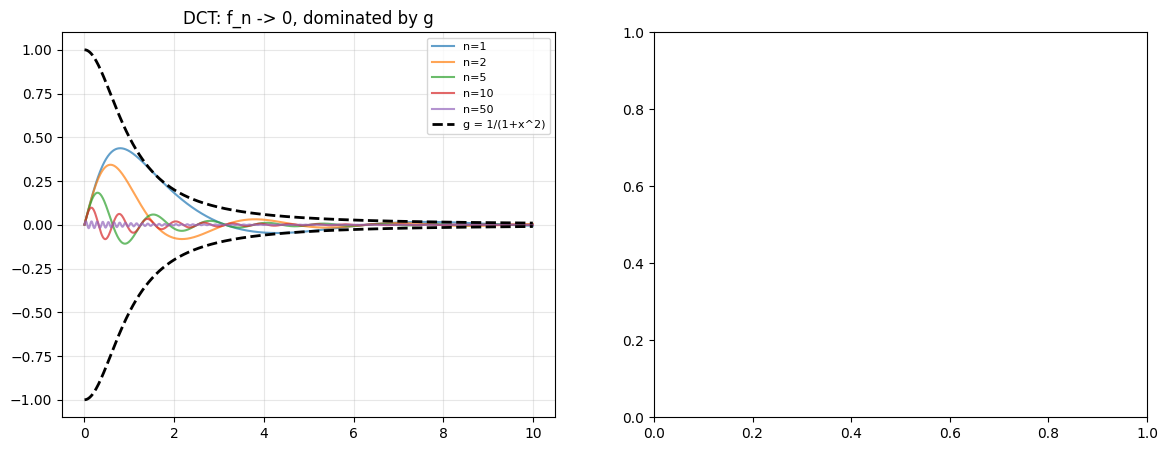

In [3]:
x = np.linspace(0.001, 10, 1000)
g = 1 / (1 + x**2)  # dominating function

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for n in [1, 2, 5, 10, 50]:
    fn = np.sin(n*x) / (n * (1 + x**2))
    ax1.plot(x, fn, label=f'n={n}', alpha=0.7)
ax1.plot(x, g, 'k--', linewidth=2, label='g = 1/(1+x^2)')
ax1.plot(x, -g, 'k--', linewidth=2)
ax1.set_title('DCT: f_n -> 0, dominated by g', fontsize=12)
ax1.legend(fontsize=8); ax1.grid(True, alpha=0.3)

ints = [np.trapz(np.sin(n*x)/(n*(1+x**2)), x) for n in range(1, 101)]
ax2.plot(range(1,101), ints, 'b-')
ax2.axhline(0, color='red', linestyle='--', label='int f = 0')
ax2.set_xlabel('n'); ax2.set_ylabel('integral')
ax2.set_title('DCT: integrals -> 0', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Counterexample: Limit-Integral Swap Fails

$f_n = n \cdot \mathbf{1}_{(0,1/n]}$: $f_n \to 0$ a.e. but $\int f_n = 1 \not\to 0 = \int 0$.
Fails because there's no integrable dominating function.

In [ ]:
x = np.linspace(0.001, 1, 2000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for n in [2, 5, 10, 20, 50]:
    ax1.plot(x, n*(x<=1/n).astype(float), label=f'n={n}')
ax1.set_title('Tall thin spikes: no dominator', fontsize=12)
ax1.legend(); ax1.grid(True, alpha=0.3)

ints = [1.0] * 100
ax2.plot(range(1,101), ints, 'r-', linewidth=2)
ax2.axhline(0, color='blue', linestyle='--', label='int limit = 0')
ax2.set_xlabel('n'); ax2.set_ylabel('integral of f_n')
ax2.set_title('int f_n = 1, but int(lim f_n) = 0', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **MCT:** monotone + non-negative => swap limit and integral.
2. **DCT:** dominated by integrable function => swap limit and integral.
3. **Without hypotheses, the swap fails:** tall thin spikes show $\lim\int \neq \int\lim$.
4. These theorems are the workhorses of Lebesgue integration.